In [1]:
# Import required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [2]:
# Read the data

corolla = pd.read_csv("ToyotaCorolla.csv",encoding= 'unicode_escape')
corolla

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
# EDA

corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
corolla.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# As per the problem statement, only few columns need to be considered
# Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

corolla = corolla[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight","Price"]]
corolla

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025,7500
1432,72,19000,86,1300,3,5,69,1015,10845
1433,71,17016,86,1300,3,5,69,1015,8500
1434,70,16916,86,1300,3,5,69,1015,7250


In [6]:
# Renaming Columns

corolla = corolla.rename({"Age_08_04":"Age","Quarterly_Tax":"Tax"}, axis=1)
corolla

,Age,KM,HP,cc,Doors,Gears,Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025,7500
1432,72,19000,86,1300,3,5,69,1015,10845
1433,71,17016,86,1300,3,5,69,1015,8500
1434,70,16916,86,1300,3,5,69,1015,7250


In [7]:
#check for missing values

corolla.isna().sum()

Age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
Tax       0
Weight    0
Price     0
dtype: int64

In [8]:
# Checking for Duplicated values

corolla[corolla.duplicated()]

,Age,KM,HP,cc,Doors,Gears,Tax,Weight,Price
113,8,13253,116,2000,5,5,234,1320,24950


In [9]:
corolla.shape

(1436, 9)

In [10]:
# Dropping duplicate columns

corolla = corolla.drop_duplicates().reset_index(drop=True)

In [11]:
corolla.shape

(1435, 9)

In [12]:
# Checking for correlation among X columns

corolla.corr()

,Age,KM,HP,cc,Doors,Gears,Tax,Weight,Price
Age,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484,-0.876273
KM,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969,-0.569420
HP,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143,0.314134
cc,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077,0.124375
Doors,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734,0.183604
Gears,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238,0.063831
Tax,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988,0.211508
Weight,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000,0.575869
Price,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869,1.000000


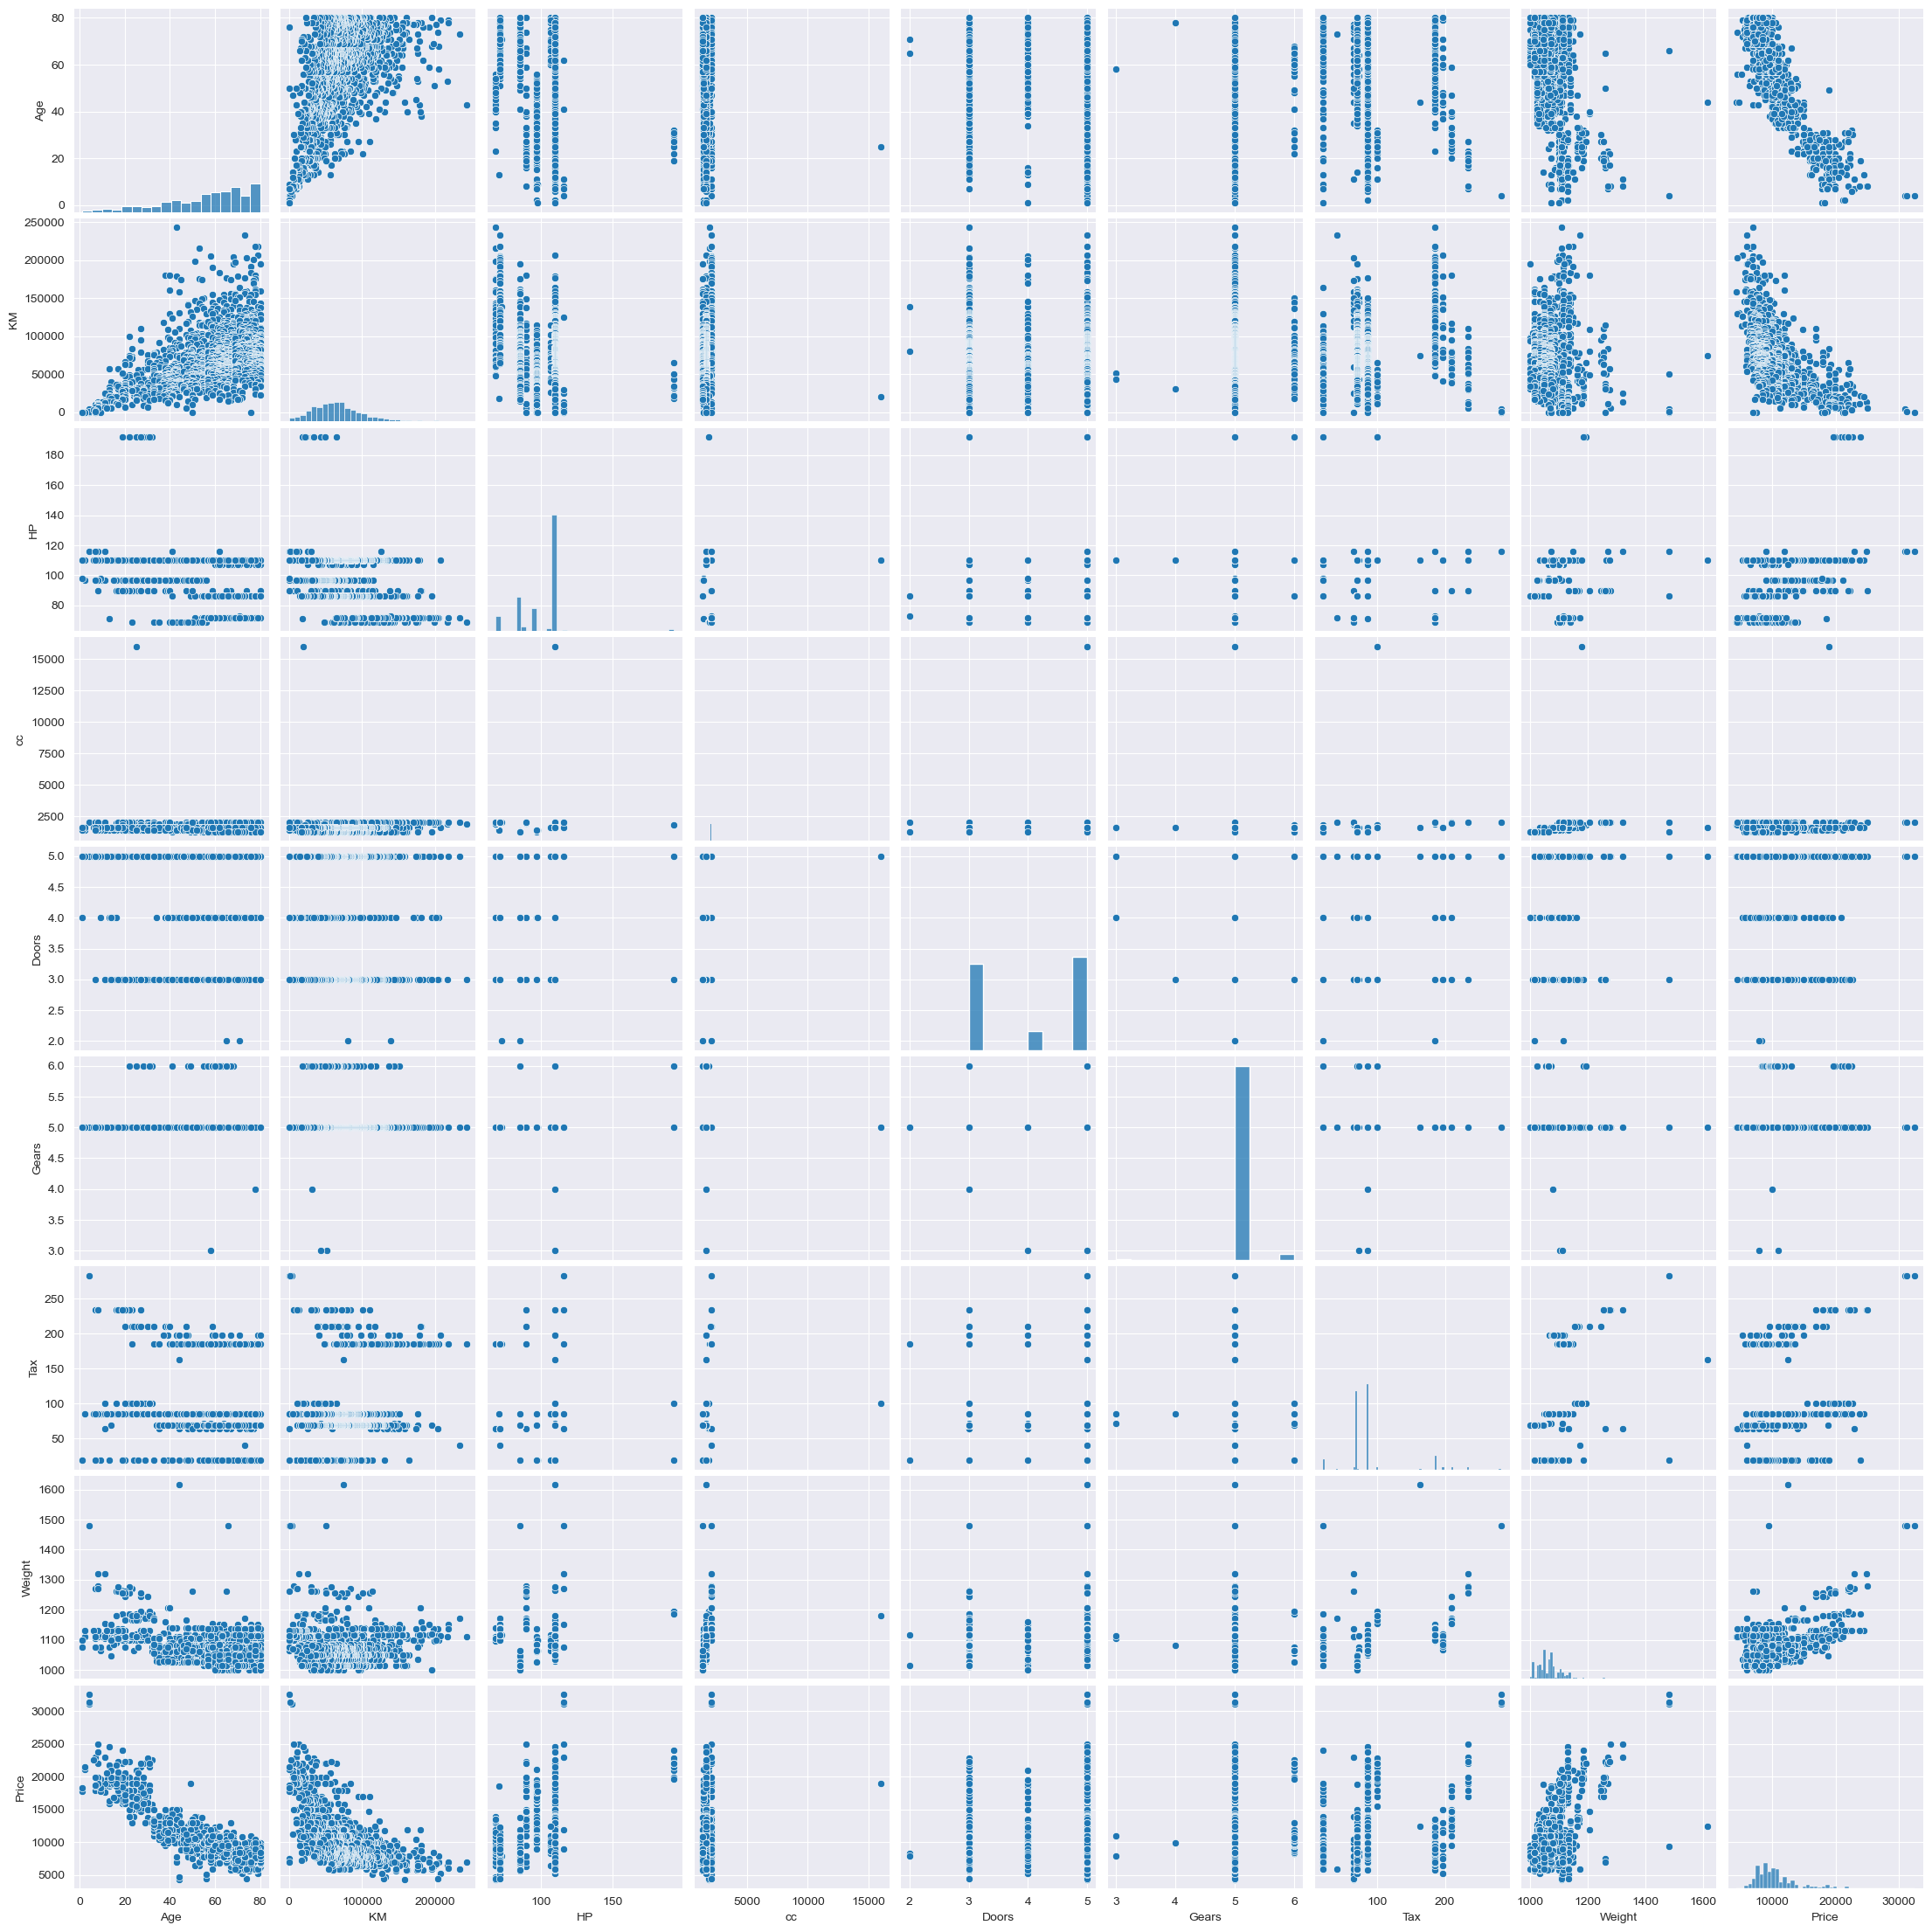

In [13]:
sns.set_style(style='darkgrid')
sns.pairplot(corolla)

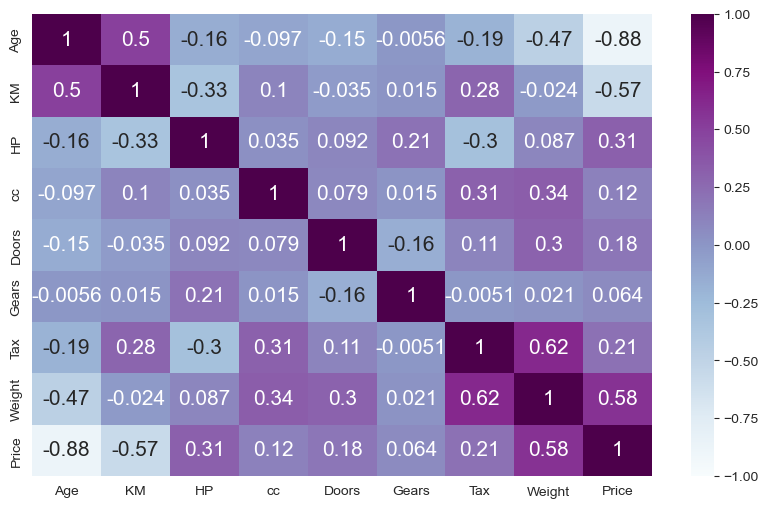

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(corolla.corr(), annot=True, vmin=-1, vmax=1, cmap='BuPu', annot_kws={'size': 15});

In [15]:
corolla.head(2)

,Age,KM,HP,cc,Doors,Gears,Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750


In [16]:
# Preparing a Preliminary Model with all X columns

model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data=corolla).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:54:46   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
Tax            3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#Coefficients

model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
Tax             3.858805
Weight         16.855470
dtype: float64

In [18]:
#t and p-Values

print(model.tvalues, '\n\n', np.round(model.pvalues, 4))

Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
cc           -1.316436
Doors        -0.023012
Gears         3.034563
Tax           2.944198
Weight       15.760663
dtype: float64 

 Intercept    0.0001
Age          0.0000
KM           0.0000
HP           0.0000
cc           0.1882
Doors        0.9816
Gears        0.0025
Tax          0.0033
Weight       0.0000
dtype: float64


In [19]:
#R squared values

(model.rsquared,model.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

In [20]:
# Let us build SLR & MLR for cc and Doors which have a p-value > 0.05

model_cc=smf.ols('Price~cc',corolla).fit()
model_cc.tvalues, model_cc.pvalues

(Intercept    24.879592
 cc            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 cc            2.292856e-06
 dtype: float64)

In [21]:
model_doors=smf.ols('Price~Doors',corolla).fit()
model_doors.tvalues, model_doors.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [22]:
model_cc_Doors=smf.ols('Price~cc+Doors',corolla).fit()
model_cc_Doors.tvalues,model_cc_Doors.pvalues

(Intercept    12.786341
 cc            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 cc           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

In [23]:
# Calculating Variance Inflation Factor (VIF)

rsq_AG=smf.ols('Age~KM+HP+cc+Doors+Gears+Tax+Weight',corolla).fit().rsquared
vif_AG=1/(1-rsq_AG)

rsq_KM=smf.ols('KM~Age+HP+cc+Doors+Gears+Tax+Weight',corolla).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~KM+Age+cc+Doors+Gears+Tax+Weight',corolla).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('cc~KM+HP+Age+Doors+Gears+Tax+Weight',corolla).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~KM+HP+cc+Age+Gears+Tax+Weight',corolla).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~KM+HP+cc+Doors+Age+Tax+Weight',corolla).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('Tax~KM+HP+cc+Doors+Gears+Age+Weight',corolla).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_Wt=smf.ols('Weight~KM+HP+cc+Doors+Gears+Tax+Age',corolla).fit().rsquared
vif_Wt=1/(1-rsq_Wt)

d1 = {'variables':['Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Tax', 'Weight'],'Vif':[vif_AG,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_Wt]}
Vif_Frame = pd.DataFrame(d1)
Vif_Frame

,variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Tax,2.295375
7,Weight,2.487180


In [24]:
# VIF is in range 0-5 for all the Numeric X variables, which is considered Excellent
# We can safely assume there is no correlation between X variables

In [25]:
# We also do not need AIC for subset selection as there is no dependency between X columns

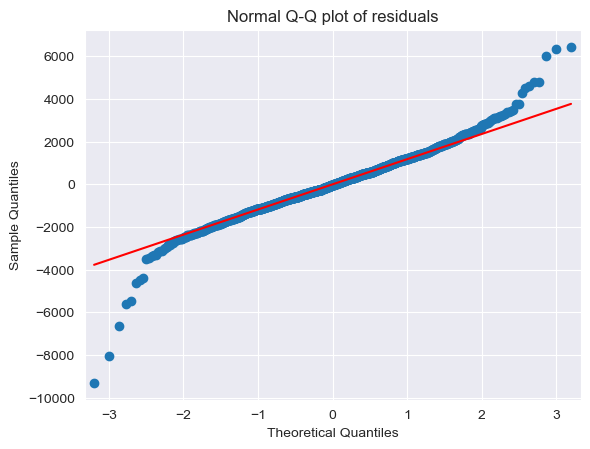

In [26]:
# Residual Analysis

import statsmodels.api as sm

model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data=corolla).fit()
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [27]:
# (y-y_hat) values

model.resid 

0      -3291.958871
1      -2503.800414
2      -2829.635210
3      -1455.789389
4      -2450.217277
           ...     
1430   -1294.255037
1431    2552.422658
1432      44.565598
1433   -1329.222041
1434   -3446.087526
Length: 1435, dtype: float64

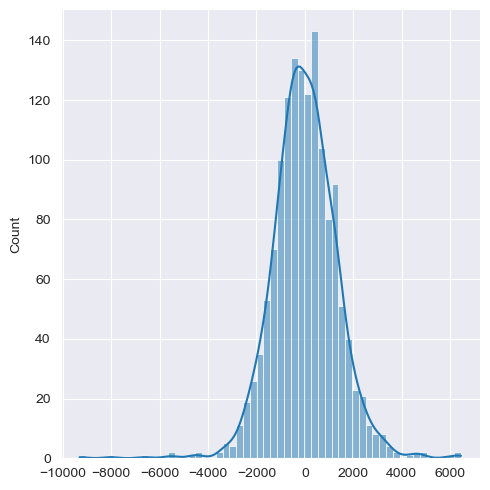

In [28]:
sns.displot(model.resid, kde=True) # Residual values distribution

In [29]:
# Outliers

list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [30]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [31]:
# Z-scores of errors (Z = x-μ/σ)

def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std() 

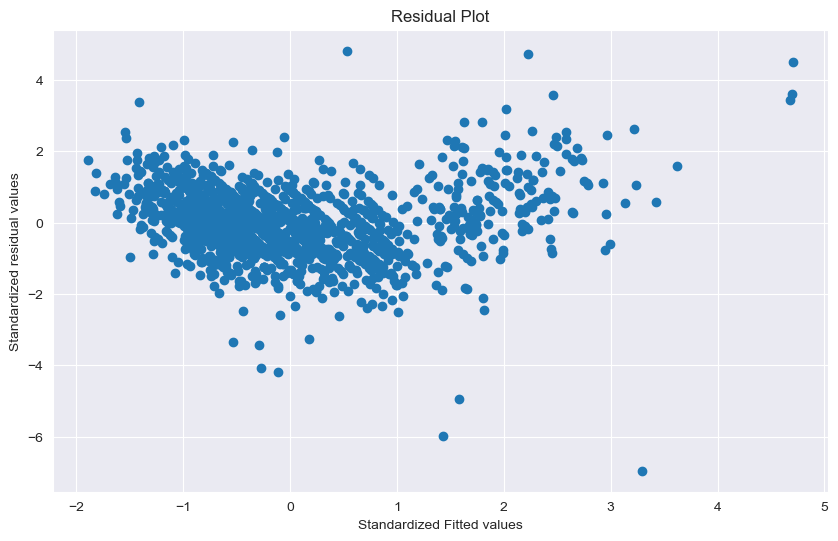

In [32]:
# Residual Plot for Homoscedasticity

plt.figure(figsize=(10,6))
plt.scatter(get_standardized_values(model.fittedvalues),    # ŷ
            get_standardized_values(model.resid))           # y-ŷ

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Here the Residual plot is scattered with no trend, which is ideal

Residuals regression plot for Age


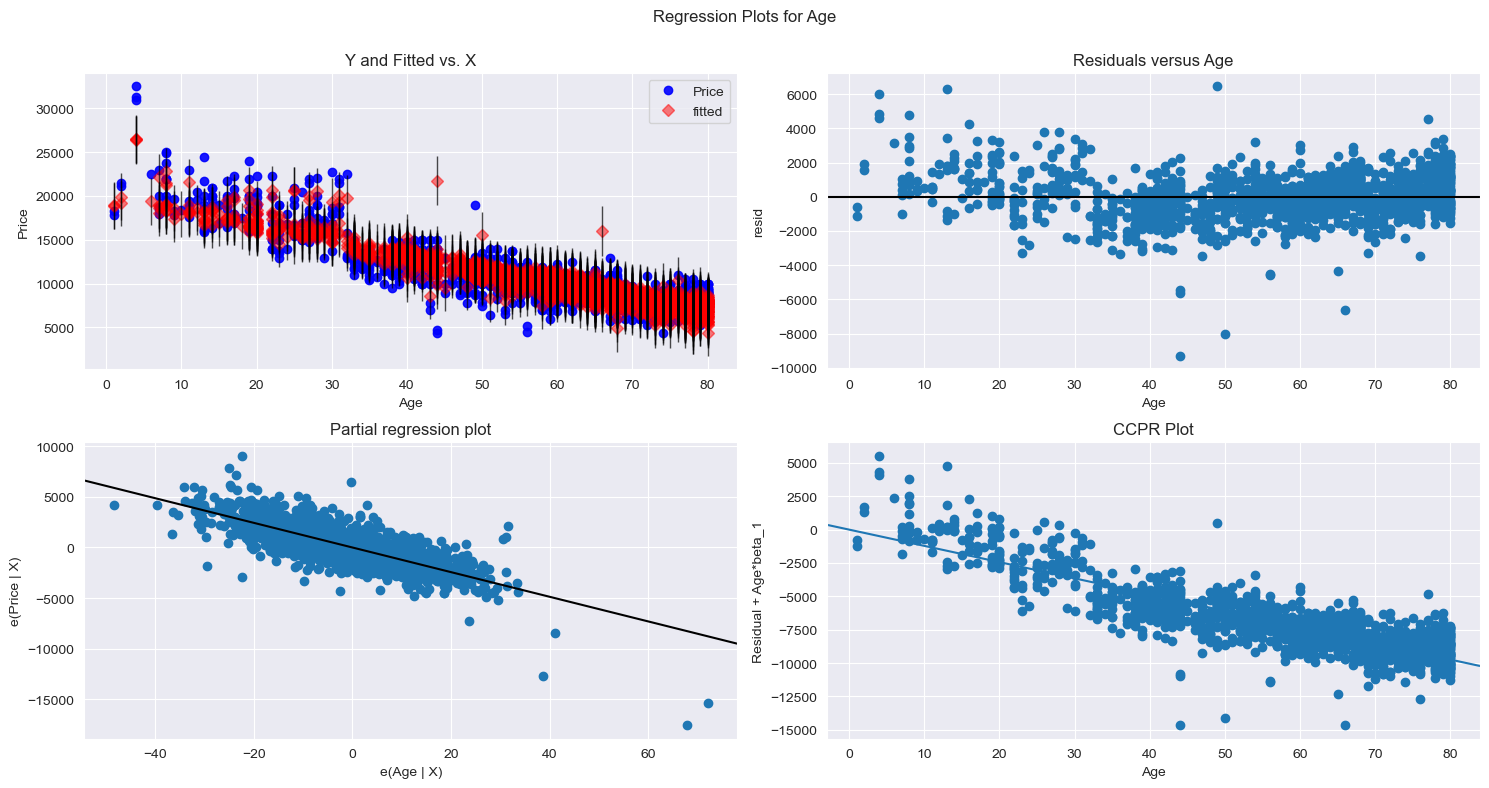

***************************************
Residuals regression plot for KM


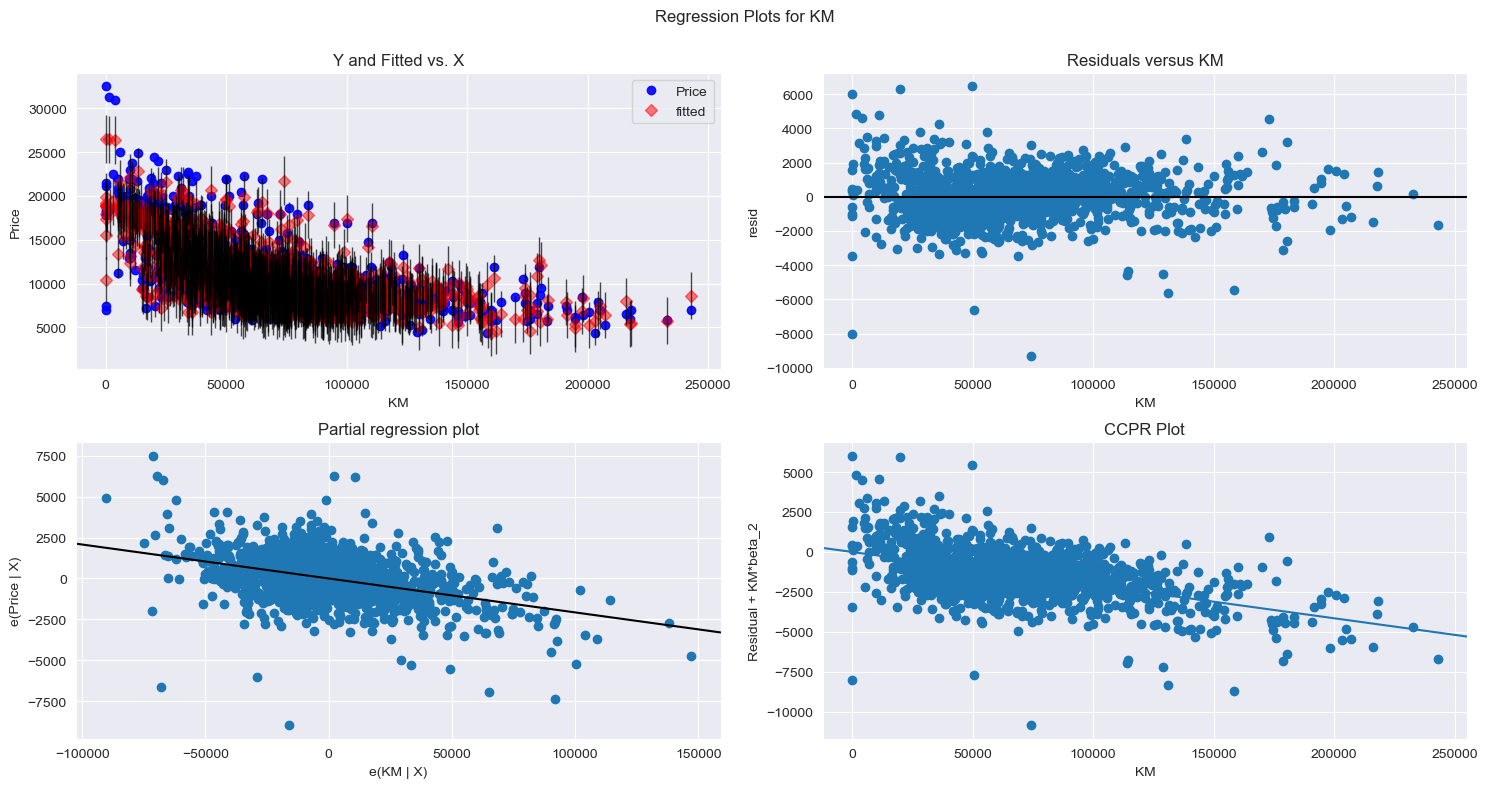

***************************************
Residuals regression plot for HP


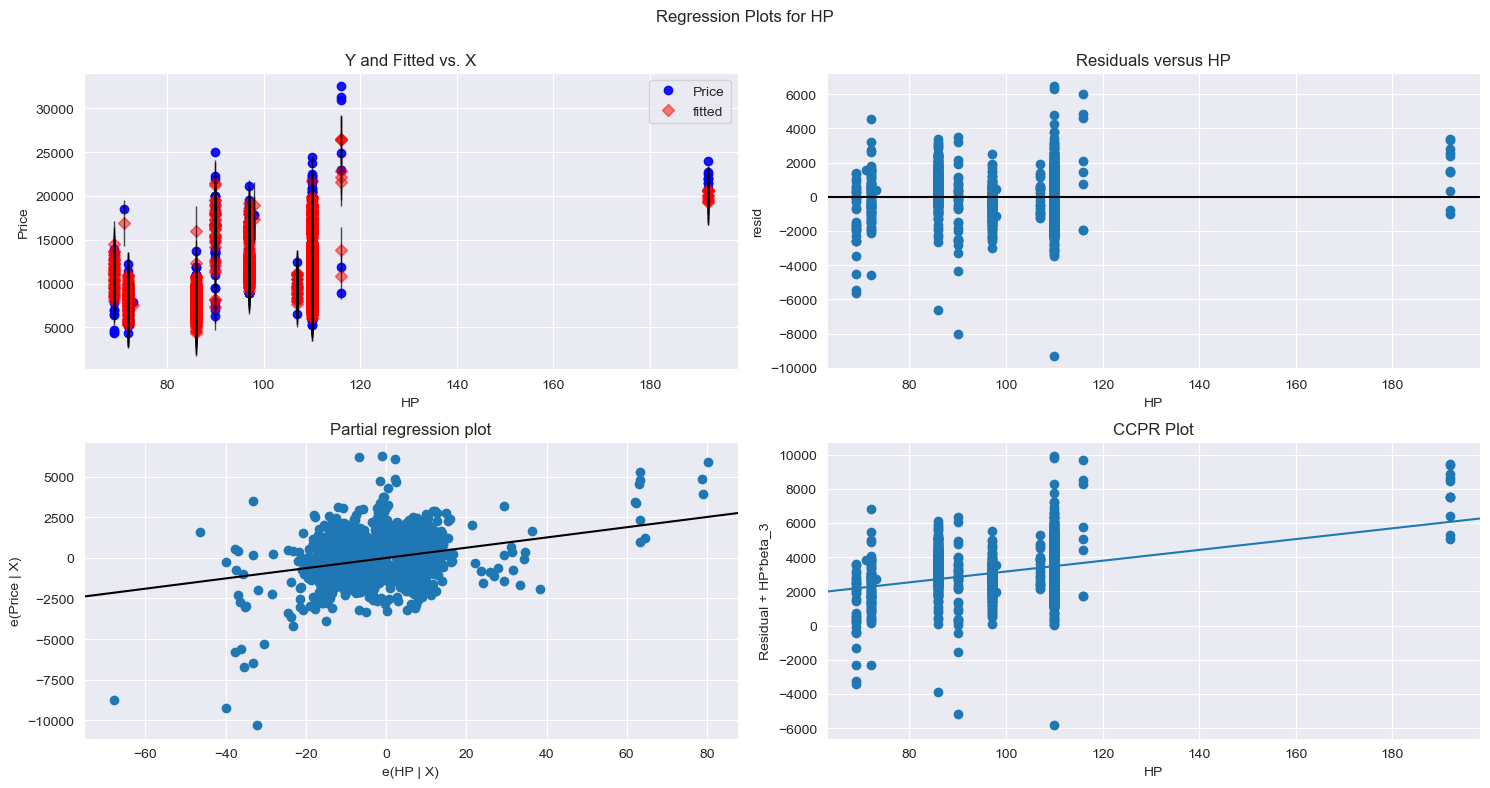

***************************************
Residuals regression plot for cc


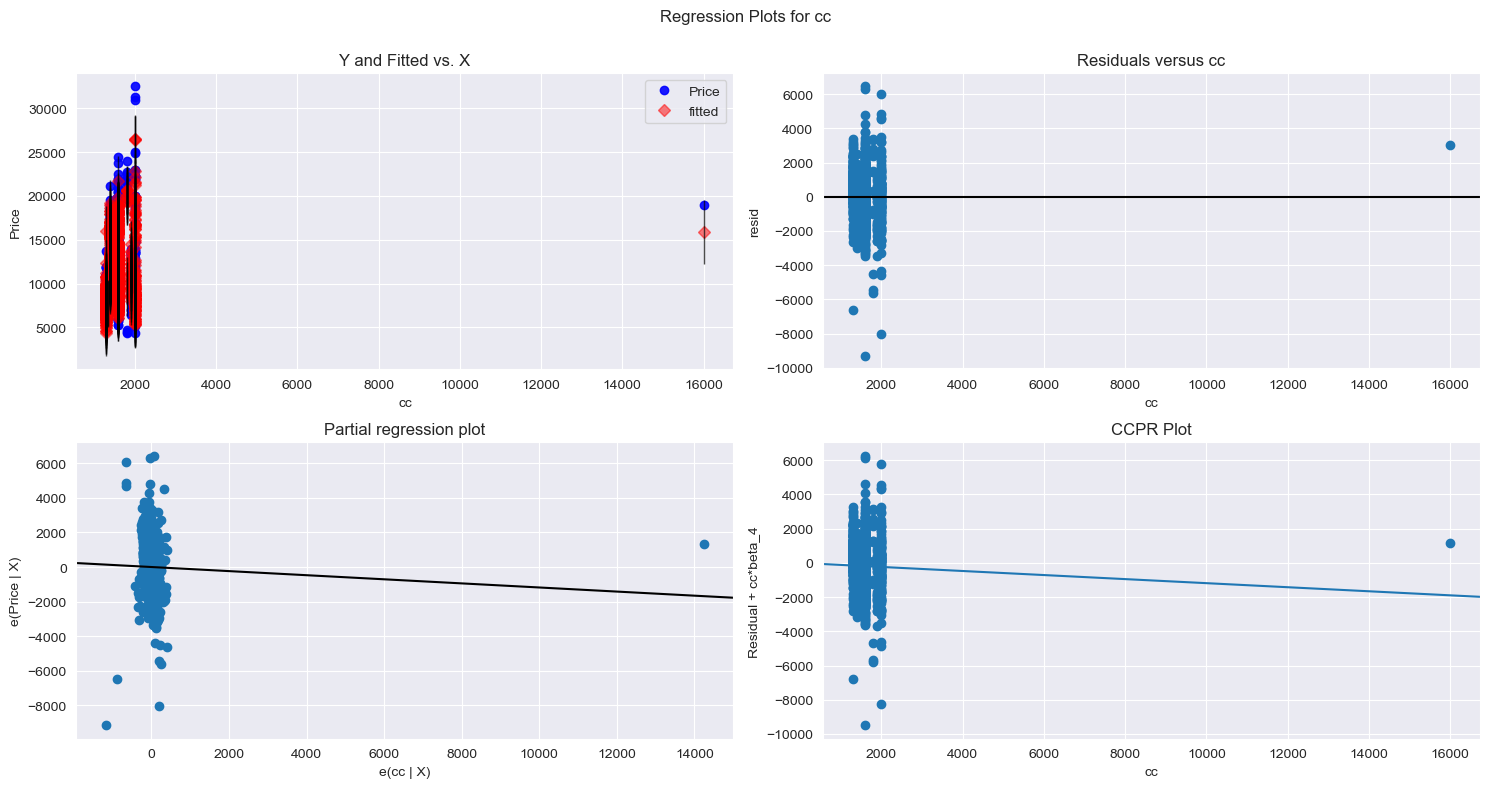

***************************************
Residuals regression plot for Doors


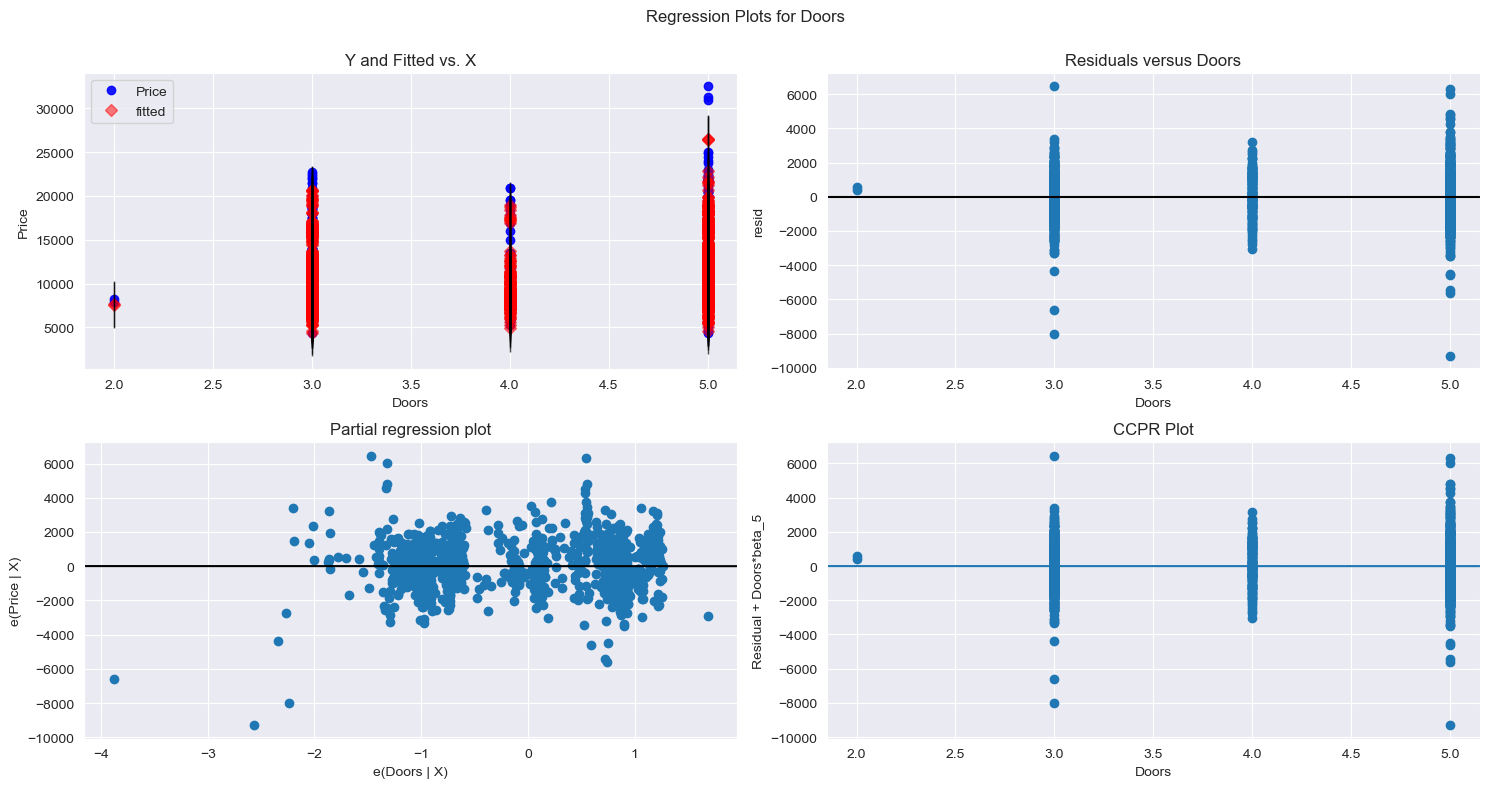

***************************************
Residuals regression plot for Gears


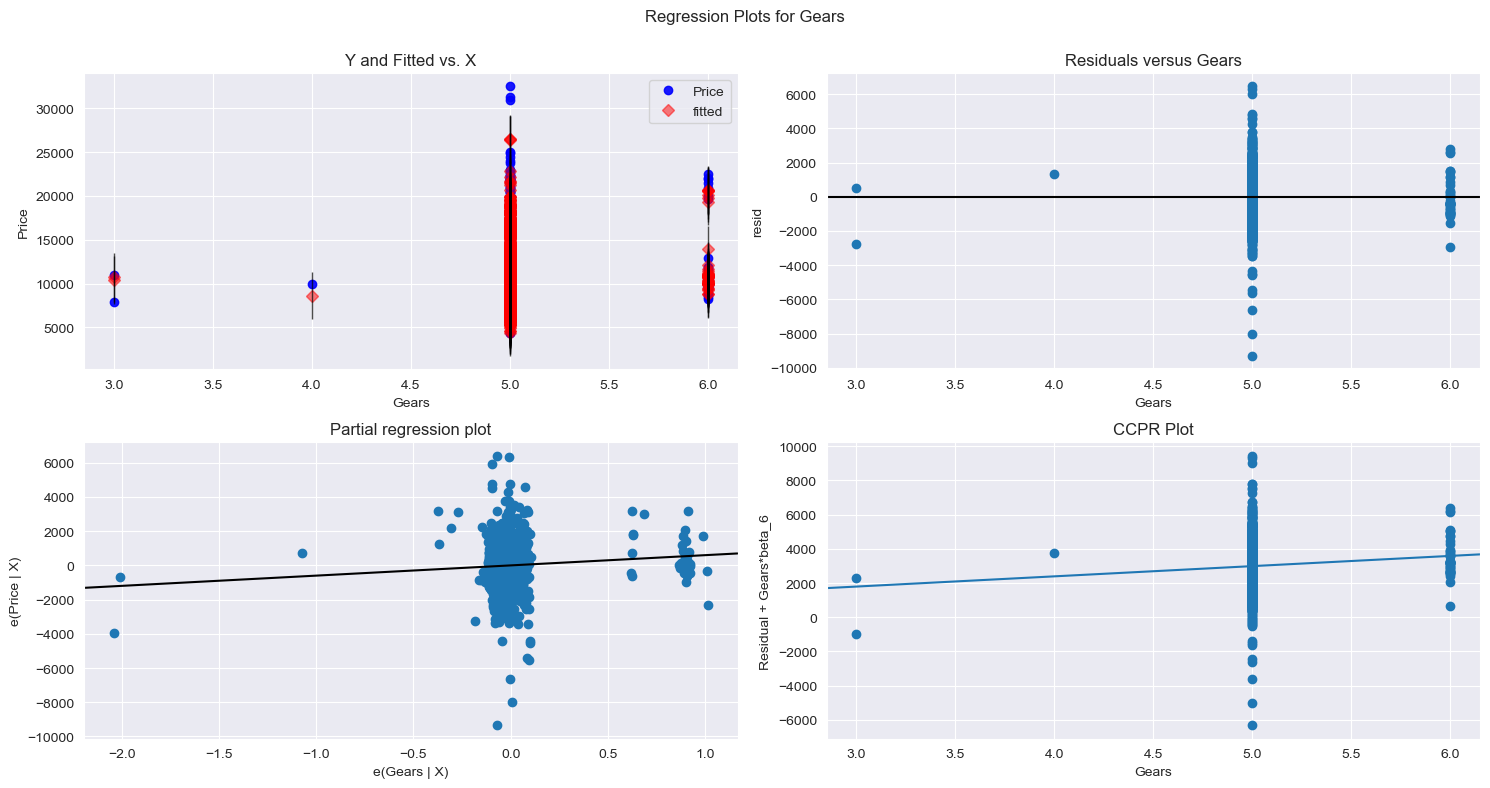

***************************************
Residuals regression plot for Tax


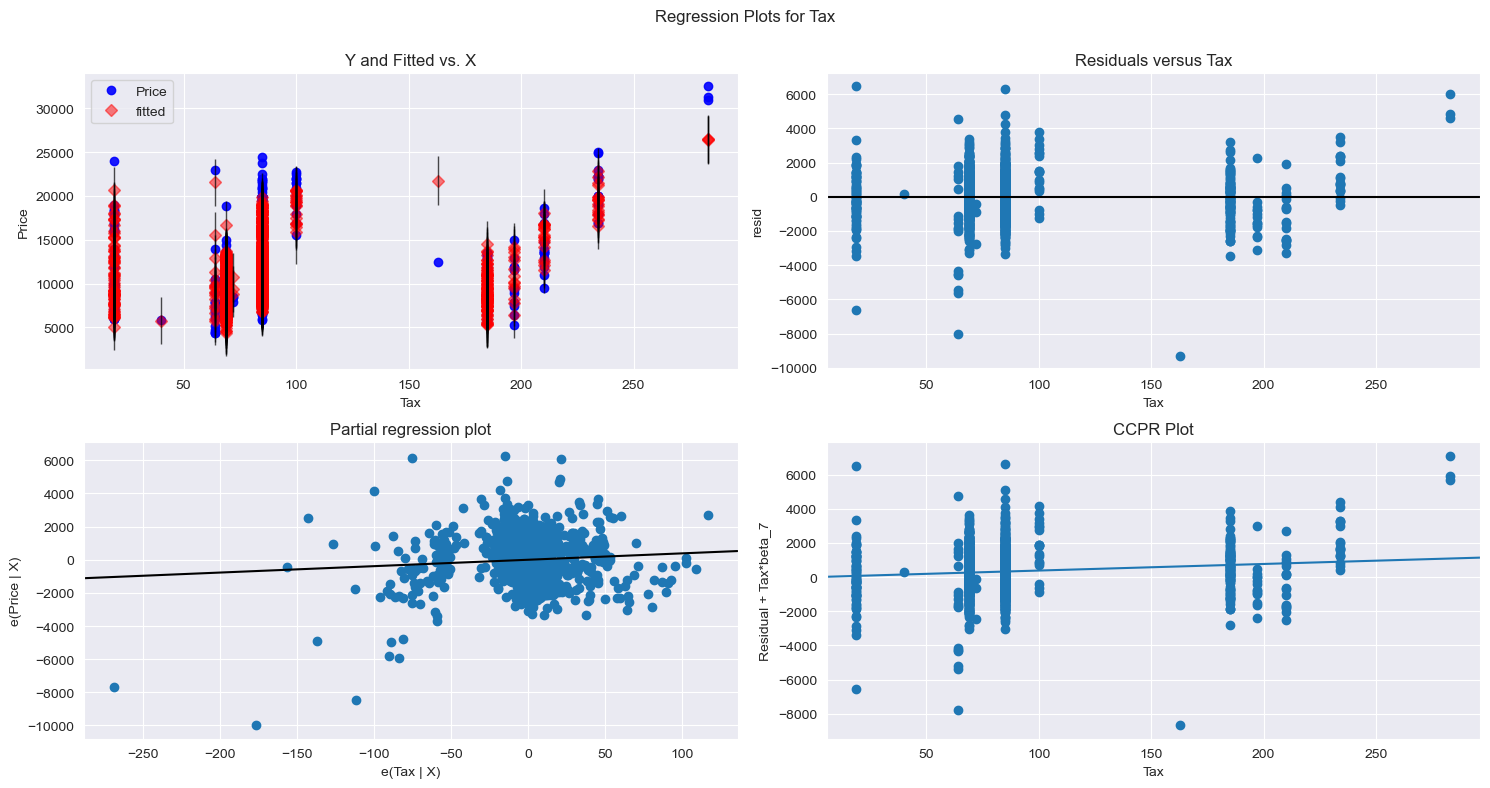

***************************************
Residuals regression plot for Weight


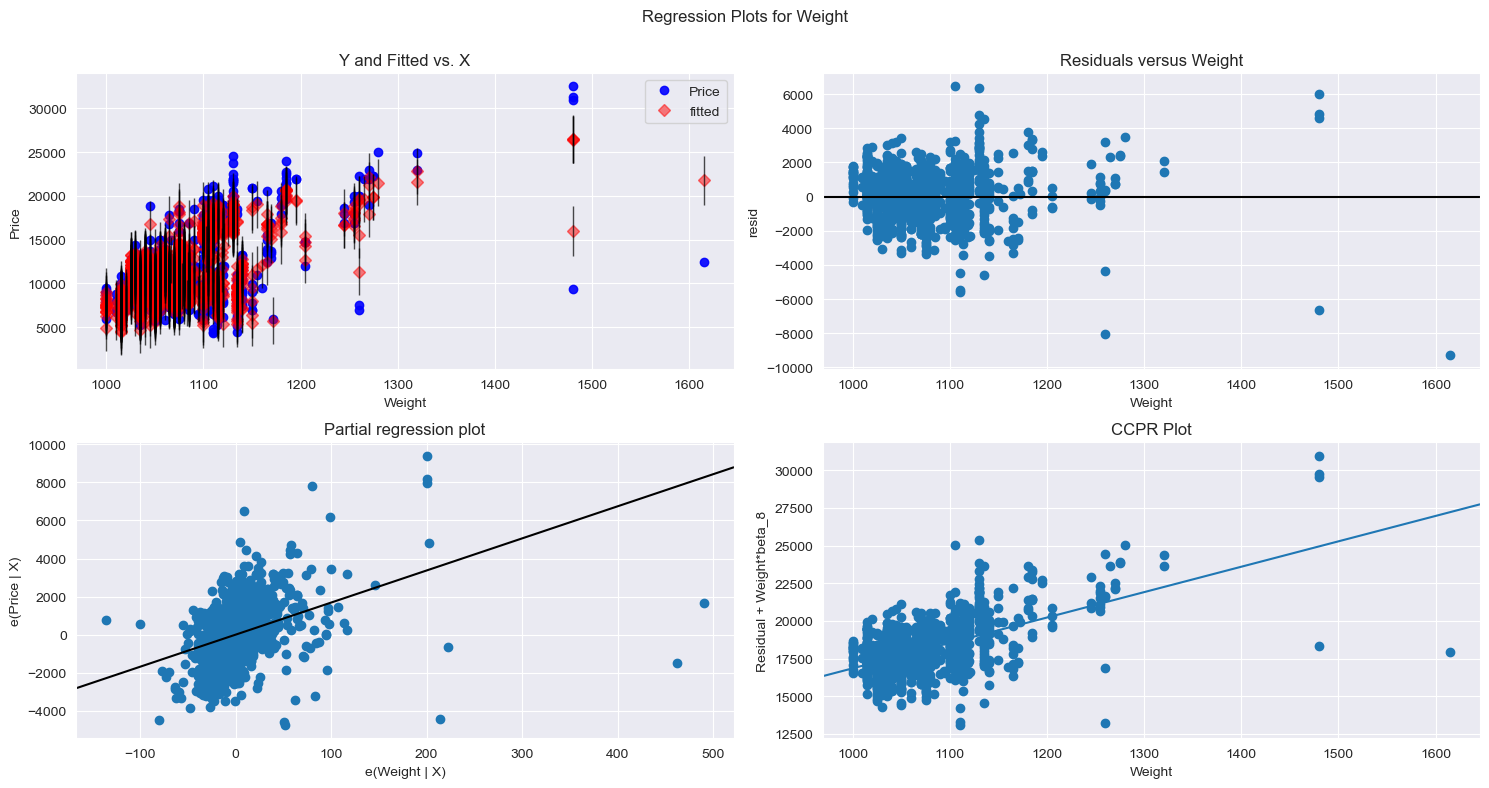

***************************************


In [33]:
# Residuals vs Regressors Plot

for i in corolla.columns:
    if i!='Price':
        fig=plt.figure(figsize=(15,8))
        print("Residuals regression plot for {}".format(i))
        sm.graphics.plot_regress_exog(model,i,fig=fig)
        plt.show()
        print("***************************************")

In [34]:
# Model Deletion Diagnostics
# Detecting Outliers/Influencers

# Cook's Distance

from statsmodels.graphics.regressionplots import influence_plot
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

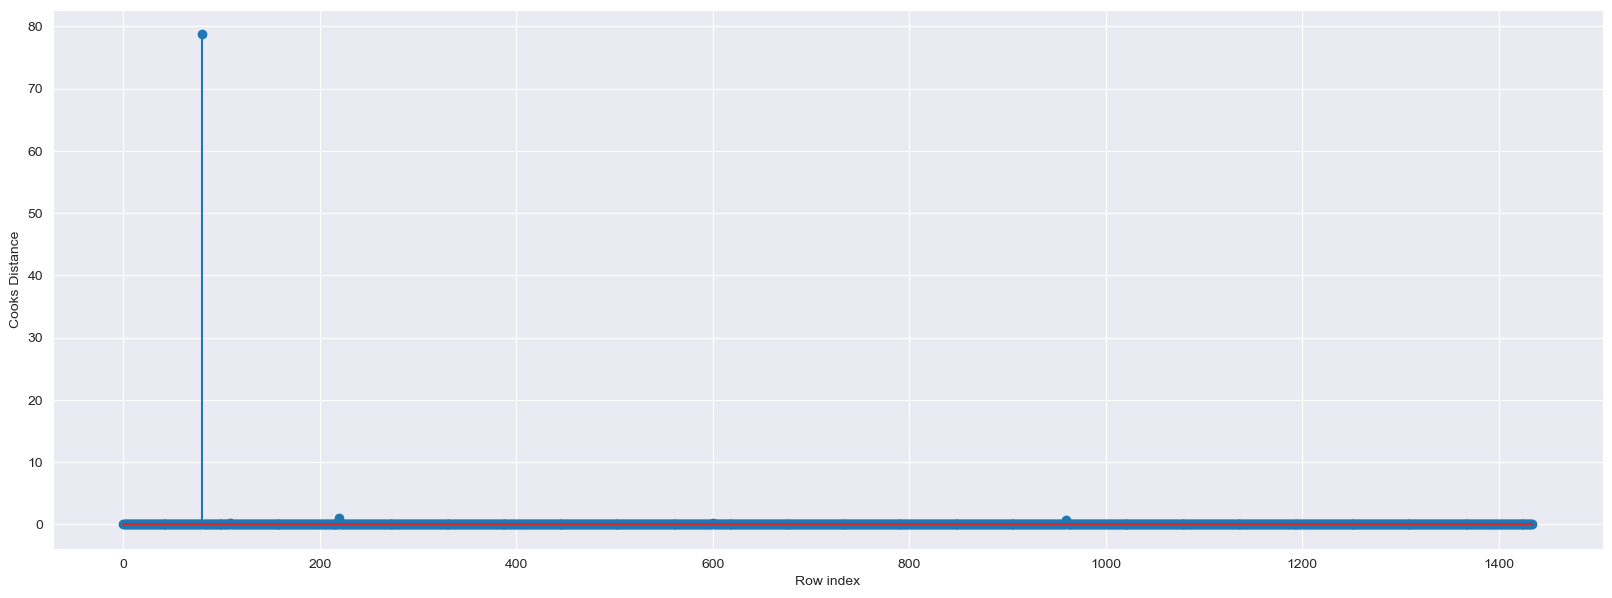

In [35]:
#Plot the influencers values using stem plot

fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(corolla)), np.round(c, 3)) 
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [36]:
# Index and value of influencer 

np.argmax(c) , np.max(c)

(80, 78.72950582248895)

In [37]:
k = corolla.shape[1]
n = corolla.shape[0]
leverage_cutoff = 3*((k + 1)/n) 
leverage_cutoff

0.020905923344947737

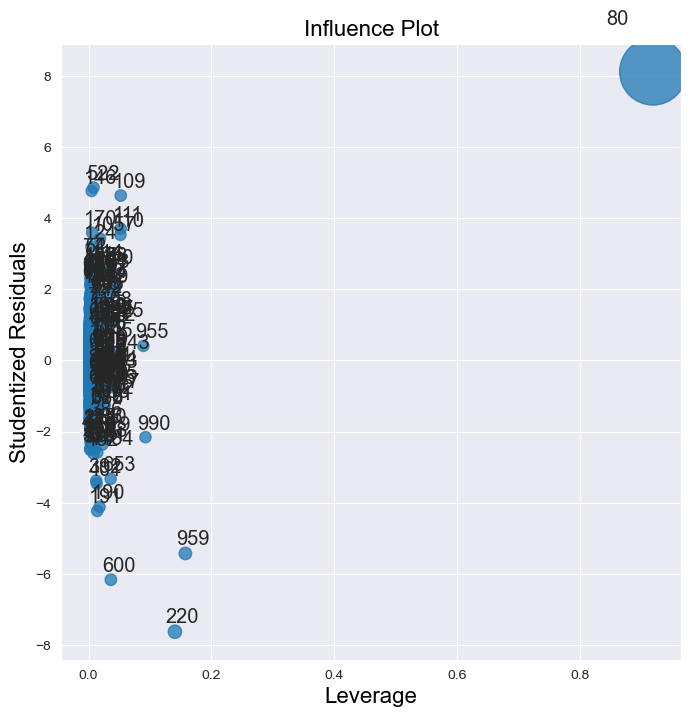

In [38]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(8,8))
fig=influence_plot(model,ax=ax)

In [39]:
# From the above plot, it can be seen that point 80 is influencer

corolla[corolla.index.isin([80])]

,Age,KM,HP,cc,Doors,Gears,Tax,Weight,Price
80,25,20019,110,16000,5,5,100,1180,18950


In [40]:
corolla.shape

(1435, 9)

In [41]:
# Improving the Model

#Discard the data points which are influencers and reasign the row number (reset_index())

corolla1 = corolla.drop(corolla.index[80],axis=0).reset_index()

In [42]:
corolla1

,index,Age,KM,HP,cc,Doors,Gears,Tax,Weight,Price
0,0,23,46986,90,2000,3,5,210,1165,13500
1,1,23,72937,90,2000,3,5,210,1165,13750
2,2,24,41711,90,2000,3,5,210,1165,13950
3,3,26,48000,90,2000,3,5,210,1165,14950
4,4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...,...
1429,1430,69,20544,86,1300,3,5,69,1025,7500
1430,1431,72,19000,86,1300,3,5,69,1015,10845
1431,1432,71,17016,86,1300,3,5,69,1015,8500
1432,1433,70,16916,86,1300,3,5,69,1015,7250


In [43]:
#Drop the original index

corolla1 = corolla1.drop(['index'],axis=1)

In [44]:
corolla1

,Age,KM,HP,cc,Doors,Gears,Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1429,69,20544,86,1300,3,5,69,1025,7500
1430,72,19000,86,1300,3,5,69,1015,10845
1431,71,17016,86,1300,3,5,69,1015,8500
1432,70,16916,86,1300,3,5,69,1015,7250


In [45]:
corolla1.shape

(1434, 9)

In [46]:
# Model Deletion Diagnostics

while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data=corolla1).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    corolla1=corolla1.drop(corolla1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    corolla1
else:
    final_model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data=corolla1).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [47]:
final_model.rsquared, final_model.rsquared_adj

(0.8882395145171204, 0.8876107635439396)

In [48]:
# Prediciting for New data

new_data=pd.DataFrame({'Age':25,"KM":45012,"HP":85,"cc":1600,"Doors":4,"Gears":5,"Tax":200,"Weight":1200},index=[0])
new_data

,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,25,45012,85,1600,4,5,200,1200


In [49]:
data_pred=final_model.predict(new_data)
data_pred

0    18404.401609
dtype: float64

In [50]:
pred_y=final_model.predict(corolla1)
corolla1['pred_y']=pred_y

In [51]:
corolla1.head(7)

,Age,KM,HP,cc,Doors,Gears,Tax,Weight,Price,pred_y
0,23,46986,90,2000,3,5,210,1165,13500,16345.352610
1,23,72937,90,2000,3,5,210,1165,13750,15886.635544
2,24,41711,90,2000,3,5,210,1165,13950,16328.224968
3,26,48000,90,2000,3,5,210,1165,14950,15996.318854
4,30,38500,90,2000,3,5,210,1170,13750,15883.424182
5,32,61000,90,2000,3,5,210,1170,12950,15264.967942
6,27,94612,90,2000,3,5,210,1245,16900,17632.593606


In [52]:
# R2 Table

r2={'prep_model':['model_initial','model_final'],'R2-Value':[0.8617,0.8882]}
r2=pd.DataFrame(r2)
r2

,prep_model,R2-Value
0,model_initial,0.8617
1,model_final,0.8882
